# Exercice Python : Lecture d'un fichier CSV

## Lecture

Je me permets de commencer par l'import de la librairie `pandas` plutôt de `csv`. Cette librairie est réputée pour son côté pratique et se rapproche de ce qui se fait en R.

In [716]:
import pandas as pd

# Paramétrage de l'affichage des colonnes
pd.options.display.max_columns = 99

L'échantillon n'étant pas encodé dans les formats par défaut (UTF-8 avec des séparateurs `,`), je précise ces éléments à la lecture du fichier CSV.

In [717]:
data = pd.read_csv('/Users/theyanike/Documents/DataScience/TechTest/Tech4team/sample.csv', 
                   encoding='latin-1', 
                   sep=';')
data.head()

,Numero billet,Commande,Reservation,Date reservation,Heure reservation,Cle spectacle,Spectacle,Cle representation,Representation,Date representation,Heure representation,Date fin representation,Heure fin representation,Prix,Date acces,Heure acces,Tarif,Type de client,Type de produit,Serie,Etage,Filiere de vente,Nom,Prenom,Email,Adresse,Code postal,Pays,Age,Sexe
0,1400222,NaN,843989,04/06/15 00:00,16:26:04,476,FEMME NON-REEDUCABLE,3191,FEMME NON-REEDUCABLE,10/10/14,20:00:00,10/10/14,22:00:00,27.0,10/10/14,19:49:11,Abonnement mouettes,Client,Abonnement,1er Serie,CORBEILLE,GUICHET,KEBIR,Fran_ois-Jean,Fran_ois-Jean.KEBIR@mail.fr,7 rue des Acinonyx jubatus,69110,France,57.0,F
1,1400223,NaN,843990,04/06/15 00:00,16:26:04,477,G©n©rale Publique Fever,3204,G©n©rale Publique Fever,05/11/14,20:00:00,05/11/14,21:30:00,27.0,05/11/14,19:52:17,Abonnement mouettes,Client,Abonnement,1er Serie,CORBEILLE,GUICHET,KEBIR,Fran_ois-Jean,Fran_ois-Jean.KEBIR@mail.fr,7 rue des Acinonyx jubatus,69110,France,57.0,F
2,1400225,NaN,843991,04/06/15 00:00,16:26:04,479,L'HISTOIRE TERRIBLE... 2e EPOQUE,3218,L'HISTOIRE TERRIBLE... 2e EPOQUE,28/11/14,20:00:00,28/11/14,23:30:00,27.0,28/11/14,19:52:07,Abonnement mouettes,Client,Abonnement,1er Serie,CORBEILLE,GUICHET,KEBIR,Fran_ois-Jean,Fran_ois-Jean.KEBIR@mail.fr,7 rue des Acinonyx jubatus,69110,France,57.0,F
3,1400228,NaN,843992,04/06/15 00:00,16:26:04,482,LE ROI LEAR,3257,LE ROI LEAR,14/01/15,20:00:00,14/01/15,21:40:00,27.0,14/01/15,19:57:08,Abonnement mouettes,Client,Abonnement,1er Serie,ORCHESTRE,GUICHET,KEBIR,Fran_ois-Jean,Fran_ois-Jean.KEBIR@mail.fr,7 rue des Acinonyx jubatus,69110,France,57.0,F
4,1400229,NaN,843986,04/06/15 00:00,16:26:04,483,JE SUIS,3268,JE SUIS,16/01/15,20:00:00,16/01/15,21:30:00,15.0,NaN,NaN,Abonnement mouettes,Client,Abonnement,Serie unique,NaN,GUICHET,KEBIR,Fran_ois-Jean,Fran_ois-Jean.KEBIR@mail.fr,7 rue des Acinonyx jubatus,69110,France,57.0,F


La variable `Date reservation` que nous utiliserons plus tard doit être revue pour avoir un format correct à la lecture.

In [718]:
# Conversion en format date
data['Date sell'] = data['Date reservation'].apply(pd.to_datetime, format='%d/%m/%y %H:%M')

# Retour en 'object' avec format unlisible
data['Date sell'] = data['Date sell'].apply(lambda date: date.strftime('%d %B% %Y'))

## Exploration

### Général

Voici quelques informations qui me permettront d'en savoir plus sur la donnée.

In [719]:
print("Le dataset contient", data.shape[0], "lignes et", data.shape[1], "colonnes.")

Le dataset contient 99 lignes et 31 colonnes.


In [720]:
print("Il y a eu un total de", len(data['Reservation'].unique()), "réservations uniques.")

Il y a eu un total de 73 réservations uniques.


### Âge des clients

In [721]:
# Mémorisation des informations
age_desc = data['Age'].describe()

# Création d'un résumé sous la forme d'un dataframe 
age_summary = pd.DataFrame(index=["Moyenne", "Médiane", "Valeur max", "Valeur min", "Q1", "Q3"]) 
age_summary['Âge des clients'] = [ageDesc['mean'], 
                                  ageDesc['50%'], 
                                  ageDesc['max'], 
                                  ageDesc['min'], 
                                  ageDesc['25%'], 
                                  ageDesc['75%']]

Voici les **données descriptives concernant l'âge des clients**.

In [722]:
age_summary

,Âge des clients
Moyenne,68.514286
Médiane,66.000000
Valeur max,81.000000
Valeur min,50.000000
Q1,57.000000
Q3,81.000000


### Spectacles

In [723]:
print("La donnée concerne", len(data['Spectacle'].unique()), "représentations.")

La donnée concerne 25 représentations.


J'importe la deuxième librairie dont j'ai besoin, `numpy`.

In [724]:
import numpy as np

Nous créons un dataframe ne contenant que trois des variables de `data`. La donnée est manipulée afin de mettre en valeur la moyenne des prix selon le spectacle.

In [725]:
spect = pd.concat([data['Spectacle'], data['Cle spectacle'], data['Prix']], axis=1)

# Paramétrage des élements à aggréger
aggregations = {
    'Prix': {
        # Calcul de la moyenne arrondie au 100è
        'Moyenne': lambda prix: np.round(np.mean(prix), 2),
        # Affichage de la longueur de la liste des prix uniques
        'Nb. prix différents': lambda nb: len(set(nb))
    },
    'Cle spectacle': {
        'Nb. spectateurs': 'count'
    }
}

# Tri et aggrégation
spect_group = spect.groupby('Cle spectacle').agg(aggregations)
spect_group.head(20)

Prix           Cle spectacle
              Nb. prix différents Moyenne Nb. spectateurs
Cle spectacle                                            
476                           1.0   27.00               1
477                           1.0   27.00               1
479                           1.0   27.00               1
482                           1.0   27.00               1
483                           1.0   15.00               1
485                           1.0   27.00               1
490                           1.0   27.00               1
497                           2.0   16.00              16
498                           2.0   18.33               9
499                           1.0   31.00               1
537                           2.0   26.00               5
538                           2.0   28.00              10
539                           1.0   27.00               4
543                           2.0   24.50               2
545                           1.0   27.00               3
546                           1.0   27.00               2
548                           1.0   27.00               4
549                           1.0   27.00              10
551                           2.0   26.29               7
552                           1.0   15.00               4

Le **prix moyen par spectacle** est disponible dans la colonne **Moyenne**.

### Dates et heures d'achat

Je fais appel à la troisième librairie `matplotlib` afin de pouvoir réaliser des graphiques.

In [726]:
# Affichage des graphiques
%matplotlib inline 

import matplotlib.pyplot as plt
# Paramétrage du style des graphiques
plt.style.use('ggplot')

Pour en revenir à la date, nous devons la transformer une fois de plus pour la reconvertir en type `Date` pour notre nouvelle variable `Datetime sell`.

In [727]:
# Conversion en format date
data['Datetime sell'] = data[['Date sell', 'Heure reservation']].apply(lambda x: ' '.join(x), axis=1)

# Retour en 'object' avec format unlisible
data['Datetime sell'] = data['Datetime sell'].apply(pd.to_datetime, format='%d %B %Y %H:%M:%S')

Nous avons séparé la date de l'achat à la date complète contenant également l'heure.

In [728]:
resa = pd.concat([data['Reservation'], data['Date sell'], data['Datetime sell']], axis=1)
resa.head()

,Reservation,Date sell,Datetime sell
0,843989,04 June 2015,2015-06-04 16:26:04
1,843990,04 June 2015,2015-06-04 16:26:04
2,843991,04 June 2015,2015-06-04 16:26:04
3,843992,04 June 2015,2015-06-04 16:26:04
4,843986,04 June 2015,2015-06-04 16:26:04


In [729]:
# Paramétrage des élements à aggréger
date_agg = {
    'Reservation': {
        'Nb. billets vendus/jour': 'count'
    }
}

# Tri et aggrégation
resa_group = resa.groupby('Date sell').agg(date_agg)
resa_group

,Reservation
,Nb. billets vendus/jour
Date sell,
02 June 2015,91
04 June 2015,8


Nous observons le fait que cet échantillon contient des données sur deux jours. 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

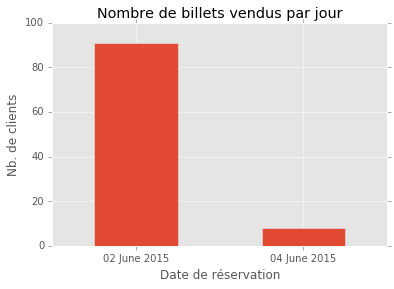

In [730]:
plt.figure()
resa_plot = resa_group.plot(kind='bar')

# Légende retirée
resa_plot.get_legend().remove()

# Personnalisation des labels
plt.xlabel("Date de réservation")
plt.ylabel("Nb. de clients")
plt.title("Nombre de billets vendus par jour")
plt.xticks(rotation="horizontal")

La date contenant l'heure est découpée de manière à pouvoir bénéficier de toutes les informations que peut nous donner une date.

In [731]:
datetime = pd.DatetimeIndex(resa['Datetime sell'])

Nous reproduisons le même exercice que précédemment en y ajoutant l'information sur le temps en heure pour le fun.

In [732]:
# Paramétrage des élements à aggréger
hour_agg = {
    'Reservation': {
        'Nb. billets vendus/heure': 'count'
    }
}

# Tri et aggrégation
resa_hour_group = resa.groupby([datetime.date, datetime.hour]).agg(hour_agg)
resa_hour_group.head(100)

Reservation
              Nb. billets vendus/heure
2015-06-02 10                       30
           12                       61
2015-06-04 16                        8

Les données ont été triées de sorte à pouvoir dire à quelle heure les billets ont été achetés. 

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

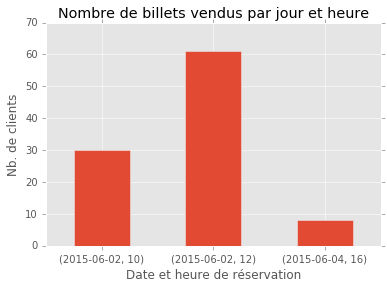

In [733]:
plt.figure()
hour_plot = resa_hour_group.plot(kind='bar')

# Légende retirée
hour_plot.get_legend().remove()

# Personnalisation des labels
plt.xlabel("Date et heure de réservation")
plt.ylabel("Nb. de clients")
plt.title("Nombre de billets vendus par jour et heure")
plt.xticks(rotation="horizontal")

## Algorithme

### Mise en situation

In [734]:
data.head()

,Numero billet,Commande,Reservation,Date reservation,Heure reservation,Cle spectacle,Spectacle,Cle representation,Representation,Date representation,Heure representation,Date fin representation,Heure fin representation,Prix,Date acces,Heure acces,Tarif,Type de client,Type de produit,Serie,Etage,Filiere de vente,Nom,Prenom,Email,Adresse,Code postal,Pays,Age,Sexe,Date sell,Datetime sell
0,1400222,NaN,843989,04/06/15 00:00,16:26:04,476,FEMME NON-REEDUCABLE,3191,FEMME NON-REEDUCABLE,10/10/14,20:00:00,10/10/14,22:00:00,27.0,10/10/14,19:49:11,Abonnement mouettes,Client,Abonnement,1er Serie,CORBEILLE,GUICHET,KEBIR,Fran_ois-Jean,Fran_ois-Jean.KEBIR@mail.fr,7 rue des Acinonyx jubatus,69110,France,57.0,F,04 June 2015,2015-06-04 16:26:04
1,1400223,NaN,843990,04/06/15 00:00,16:26:04,477,G©n©rale Publique Fever,3204,G©n©rale Publique Fever,05/11/14,20:00:00,05/11/14,21:30:00,27.0,05/11/14,19:52:17,Abonnement mouettes,Client,Abonnement,1er Serie,CORBEILLE,GUICHET,KEBIR,Fran_ois-Jean,Fran_ois-Jean.KEBIR@mail.fr,7 rue des Acinonyx jubatus,69110,France,57.0,F,04 June 2015,2015-06-04 16:26:04
2,1400225,NaN,843991,04/06/15 00:00,16:26:04,479,L'HISTOIRE TERRIBLE... 2e EPOQUE,3218,L'HISTOIRE TERRIBLE... 2e EPOQUE,28/11/14,20:00:00,28/11/14,23:30:00,27.0,28/11/14,19:52:07,Abonnement mouettes,Client,Abonnement,1er Serie,CORBEILLE,GUICHET,KEBIR,Fran_ois-Jean,Fran_ois-Jean.KEBIR@mail.fr,7 rue des Acinonyx jubatus,69110,France,57.0,F,04 June 2015,2015-06-04 16:26:04
3,1400228,NaN,843992,04/06/15 00:00,16:26:04,482,LE ROI LEAR,3257,LE ROI LEAR,14/01/15,20:00:00,14/01/15,21:40:00,27.0,14/01/15,19:57:08,Abonnement mouettes,Client,Abonnement,1er Serie,ORCHESTRE,GUICHET,KEBIR,Fran_ois-Jean,Fran_ois-Jean.KEBIR@mail.fr,7 rue des Acinonyx jubatus,69110,France,57.0,F,04 June 2015,2015-06-04 16:26:04
4,1400229,NaN,843986,04/06/15 00:00,16:26:04,483,JE SUIS,3268,JE SUIS,16/01/15,20:00:00,16/01/15,21:30:00,15.0,NaN,NaN,Abonnement mouettes,Client,Abonnement,Serie unique,NaN,GUICHET,KEBIR,Fran_ois-Jean,Fran_ois-Jean.KEBIR@mail.fr,7 rue des Acinonyx jubatus,69110,France,57.0,F,04 June 2015,2015-06-04 16:26:04


Nous allons sélectionner quelques variables pour entraine un modèle d'algorithme de Mahcine learning. Ceci reste dans le cadre de l'exercice et n'utilise pas de méthode mathématique de sélection de variables.

Pour le bonus, nous voulons étudier de plus près la variable `Etage` qui contient cinq valeurs manquantes. Nous allons tenter de les déterminer.

In [735]:
data['Etage'].value_counts()

ORCHESTRE    63
CORBEILLE    22
BALCON        6
GRADIN        2
PARTERRE      1
Name: Etage, dtype: int64

Je sélectionne quatorze variables en favorisant les identifiants (clés) de spectacles, réservations, etc.

In [736]:
sub_data = pd.concat([data['Numero billet'], 
                      data['Reservation'],
                      data['Cle spectacle'],
                      data['Cle representation'],
                      data['Prix'],
                      data['Tarif'],
                      data['Type de produit'],
                      data['Serie'],
                      data['Filiere de vente'],
                      data['Nom'],
                      data['Code postal'],
                      data['Sexe'],
                      data['Datetime sell'],
                      data['Etage']],
                     axis=1)

# Séparation du timestamp en heure et en jour de l'année
sub_data['hour'] = sub_data['Datetime sell'].dt.hour
sub_data['day'] = sub_data['Datetime sell'].dt.dayofyear
sub_data = sub_data.drop('Datetime sell', axis=1)

### Pré-processing

J'importe les éléments nécessaires au pré-processing de la librairie `scikit-learn`.

In [737]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

Les variables ont besoin d'être retravaillées afin d'avoir le format correct pour entraîner un modèle.

In [738]:
le_tarif = preprocessing.LabelEncoder()
le_tarif.fit(sub_data['Tarif'])

le_product_type = preprocessing.LabelEncoder()
le_product_type.fit(sub_data['Type de produit'])

le_serie = preprocessing.LabelEncoder()
le_serie.fit(sub_data['Serie'])

le_branch = preprocessing.LabelEncoder()
le_branch.fit(sub_data['Filiere de vente'])

le_name = preprocessing.LabelEncoder()
le_name.fit(sub_data['Nom'])

LabelEncoder()

D'autre part, j'observe les niveaux de facteurs de la variable `Sexe`...

In [739]:
sub_data['Sexe'].unique()

array(['F', 'H', nan], dtype=object)

... et de la variable `Etage`.

In [740]:
sub_data['Etage'].unique()

array(['CORBEILLE', 'ORCHESTRE', nan, 'PARTERRE', 'BALCON', 'GRADIN'], dtype=object)

Notons que les valeurs manquantes dans `Etage` sont converties en -1.

In [741]:
sub_data['Tarif'] = le_tarif.transform(sub_data['Tarif'])
sub_data['Type de produit'] = le_product_type.transform(sub_data['Type de produit'])
sub_data['Serie'] = le_serie.transform(sub_data['Serie'])
sub_data['Filiere de vente'] = le_branch.transform(sub_data['Filiere de vente'])
sub_data['Nom'] = le_name.transform(sub_data['Nom'])
sub_data['Sexe'] = sub_data['Sexe'].factorize()[0]
sub_data['Etage'] = sub_data['Etage'].factorize()[0]

sub_data.head()

,Numero billet,Reservation,Cle spectacle,Cle representation,Prix,Tarif,Type de produit,Serie,Filiere de vente,Nom,Code postal,Sexe,Etage,hour,day
0,1400222,843989,476,3191,27.0,1,0,0,1,12,69110,0,0,16,155
1,1400223,843990,477,3204,27.0,1,0,0,1,12,69110,0,0,16,155
2,1400225,843991,479,3218,27.0,1,0,0,1,12,69110,0,0,16,155
3,1400228,843992,482,3257,27.0,1,0,0,1,12,69110,0,1,16,155
4,1400229,843986,483,3268,15.0,1,0,3,1,12,69110,0,-1,16,155


Les valeurs manquantes sont regroupées dans notre échantillon de test final.

In [742]:
test = sub_data[sub_data['Etage'] == -1]
test_features = test.drop('Etage', axis=1)
test

,Numero billet,Reservation,Cle spectacle,Cle representation,Prix,Tarif,Type de produit,Serie,Filiere de vente,Nom,Code postal,Sexe,Etage,hour,day
4,1400229,843986,483,3268,15.0,1,0,3,1,12,69110,0,-1,16,155
50,1491917,838748,552,3694,15.0,1,0,3,1,1,69004,1,-1,12,153
51,1491918,838748,552,3694,15.0,1,0,3,1,1,69004,1,-1,12,153
62,1491929,838779,552,3694,15.0,1,0,3,1,10,69004,1,-1,12,153
70,1491937,838788,552,3694,15.0,1,0,3,1,10,69004,1,-1,12,153


Les autres observations constituent notre échantillon d'entraînement.

In [743]:
train = sub_data[sub_data['Etage'] != -1]
train_outcome = train['Etage']
train_features = train.drop('Etage', axis=1)

### Cross-validation

In [744]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Choix d'une référence pour les résultats aléatoires
np.random.seed(2016)

Je choisis de procéder à une cross-validation manuelle dans le cadre de l'exercice au sein des données `train`. Je les divise en 80% pour entraîner et 20% pour tester. 

In [745]:
sub_train, sub_test, sub_train_outcome, sub_test_outcome = cross_validation.train_test_split(train_features, 
                                                                                             train_outcome, 
                                                                                             test_size=0.2, 
                                                                                             random_state=0)

Dans le cadre de l'étude de la variable `Etage`, nous cherchons à déterminer des résultats sous forme de catégories. Nous sommes donc dans une optique de classification et utilisons donc l'algorithme Random Forest.

### Application

In [746]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(sub_train, sub_train_outcome)

J'entraîne mon modèle et l'applique sur mon ensemble de sous-test.

In [747]:
rf_sub_test_results = clf.predict(sub_test)

In [748]:
accuracy_score(sub_test_outcome, rf_sub_test_results)

0.89473684210526316

La pertinence atteint 89.47%.
J'étudie les particularités de l'algorithme et notamment des variables les plus importantes.

In [749]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Affichage du top des variables
print("Top des variables:")

col_labels = sub_test.columns.values.tolist()
for var in range(0, len(col_labels)):
    print("%d. %s (%f)" % (var, col_labels[var], importances[indices[var]]))

Top des variables:
0. Numero billet (0.244537)
1. Reservation (0.136839)
2. Cle spectacle (0.120432)
3. Cle representation (0.097015)
4. Prix (0.096528)
5. Tarif (0.063797)
6. Type de produit (0.061605)
7. Serie (0.041001)
8. Filiere de vente (0.040456)
9. Nom (0.026068)
10. Code postal (0.025139)
11. Sexe (0.019568)
12. hour (0.019457)
13. day (0.007557)


Je réalise un graphique afin de visualiser leur importance.

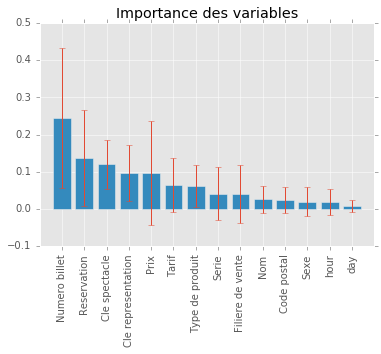

In [750]:
plt.figure()
plt.title("Importance des variables")
plt.bar(range(0, len(col_labels)), importances[indices], yerr=std[indices], align='center')
plt.xticks(range(0, len(col_labels)), col_labels, rotation='vertical')
plt.xlim([-1, len(col_labels)])
plt.show()

In [751]:
cm = confusion_matrix(sub_test_outcome, np.around(rf_sub_test_results))

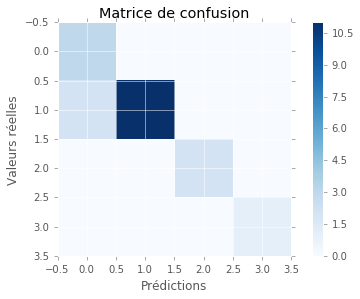

In [752]:
def plot_confusion_matrix(cm, title="Matrice de confusion", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel("Valeurs réelles")
    plt.xlabel("Prédictions")

plt.figure()
plot_confusion_matrix(cm)

### Prédiction

J'applique l'algorithme sur l'ensemble de test final.

In [753]:
rf_test_results = clf.predict(test_features)
rf_test_results

array([0, 1, 1, 1, 1])

In [754]:
etages = data['Etage'].unique()

# Création d'un dataframe contenant les valeurs finales
valid_etages = []
for key in np.nditer(rf_test_results):
    valid_etages.insert(key, etages[key])

In [755]:
final_etage = pd.DataFrame(validEtages, index=test.index, columns=['Etage'])
final_etage

,Etage
4,CORBEILLE
50,ORCHESTRE
51,ORCHESTRE
62,ORCHESTRE
70,ORCHESTRE


In [756]:
test_features['Etage'] = final_etage['Etage']

D'après l'algorithme, voici les résultats que nous devrions avoir pour la variable `Etage` sur les cinq valeurs manquantes.

In [757]:
test_features

,Numero billet,Reservation,Cle spectacle,Cle representation,Prix,Tarif,Type de produit,Serie,Filiere de vente,Nom,Code postal,Sexe,hour,day,Etage
4,1400229,843986,483,3268,15.0,1,0,3,1,12,69110,0,16,155,CORBEILLE
50,1491917,838748,552,3694,15.0,1,0,3,1,1,69004,1,12,153,ORCHESTRE
51,1491918,838748,552,3694,15.0,1,0,3,1,1,69004,1,12,153,ORCHESTRE
62,1491929,838779,552,3694,15.0,1,0,3,1,10,69004,1,12,153,ORCHESTRE
70,1491937,838788,552,3694,15.0,1,0,3,1,10,69004,1,12,153,ORCHESTRE
